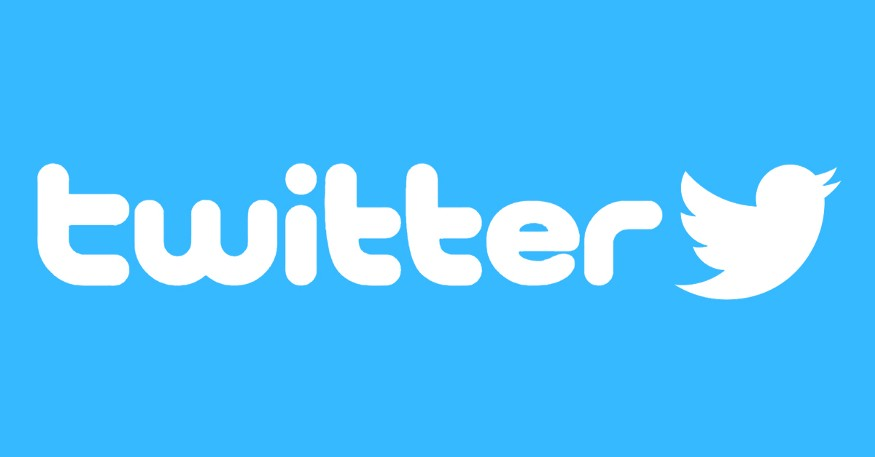

* https://www.kaggle.com/code/afi1289/twitter-daily-auto-scraper-with-tweepy
* @022 Oct 27 
* Transcribed: Jon Chun

<h1 style="font-family:verdana;"> <center> Twitter Daily Auto Scraper with Tweepy </center> </h1>
<p><center style="color:#159364; font-family:cursive;">Strive for Excellence, Not Perfection</center></p>

***

If you have ever worked on a personal data science project, you know that finding a perfect dataset for your project is often the first stumbling block. You might spend a lot of time browsing the internet searching for a suitable data for your usecase. Therefore, it might be necessary to create your own dataset. In this notebook, we will see how to to get started with the Twitter API v2 to extract tweets about any topic and build your own dataset. In addition, you will see how to update your dataset automatically from the notebook's output using an amazing Kaggle feature. 

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience 🔥. You can share it with your fellow kagglers.
</div>

<h1 style='background:#00aaee; border:0; border-radius: 10px; color:white'><center> TABLE OF CONTENTS </center></h1>

### [**1.Importing Libraries**](#title-one)

### [**2.Store and Retrieve your Individual Secrets**](#title-two)

### [**3.Connect with Twitter API v2**](#title-three)
    
### [**4.Build the Dataset**](#title-four) 

### [**5.Update your Dataset Automatically**](#title-five) 



In order to deal with the Twittter API, you have to create a developer account with the following steps:

1. Create Twitter account
2. Sign up for an **Essential** Twitter developer API access at https://developer.twitter.com/en/apply-for-access
3. Confirm your email address
4. Go to the [developer portal](https://developer.twitter.com/)
5. Create a "New Project" and give it a name
6. Fill the relevant Details in the Form with the Project Details and the Reason for accessing the API
7. Click on "Create an app" to create an Application Endpoint API
8. Fill out the form with the relevant details and agree to the terms
9. Once you click complete, you will obtain the API Keys and the Bearer Token that you can then use to connect to the new endpoints into the Twitter API.
10. Copy your Keys in a safe place on your local machine.

> **NOTES**: 
    
 > * Since we have created a new Twitter account, we will get the **Essential** access. With this access, you can only pull 500,000 Tweets per month. If you want an additional access, you have to apply for free **Elevated** access and beyond. For more information click on this [Link](https://developer.twitter.com/en/portal/products)
> * **NEVER** share your API Key, API Key Secret, or Bearer Token with anyone or display them on a Public Notebook. You will see in the second section how to store and retrieve your individual secrets in Kaggle notebook. 

<a id="title-one"></a>
<h1 style='background:#00aaee; border:2; border-radius: 10px; color:white'><center>Importing Libraries</center></h1>

Now, we can install `tweepy` and import the libraries:

In [1]:
! pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 346.6 kB/s eta 0:00:00


In [6]:
# import libraries 
import pandas as pd

pd.set_option('display.max_colwidth', None) 
pd.options.mode.chained_assignment = None

# visualization using plotly
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%matplotlib inline
import numpy as np
import tweepy

<a id="title-two"></a>
<h1 style='background:#00aaee; border:2; border-radius: 10px; color:white'><center>Store and Retrieve your Individual Secrets</center></h1>


I'm using Secrets feature in this notebook. It is available from the add-on menus in the Notebook Editor:

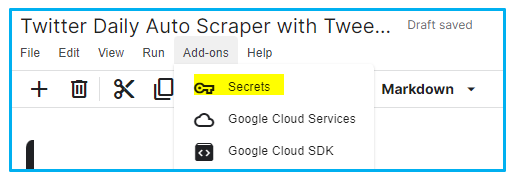

You can create new secrets that are associated with your Kaggle account by storing them as key-value pairs, and attach any secrets you would like to be used by the current Notebook:

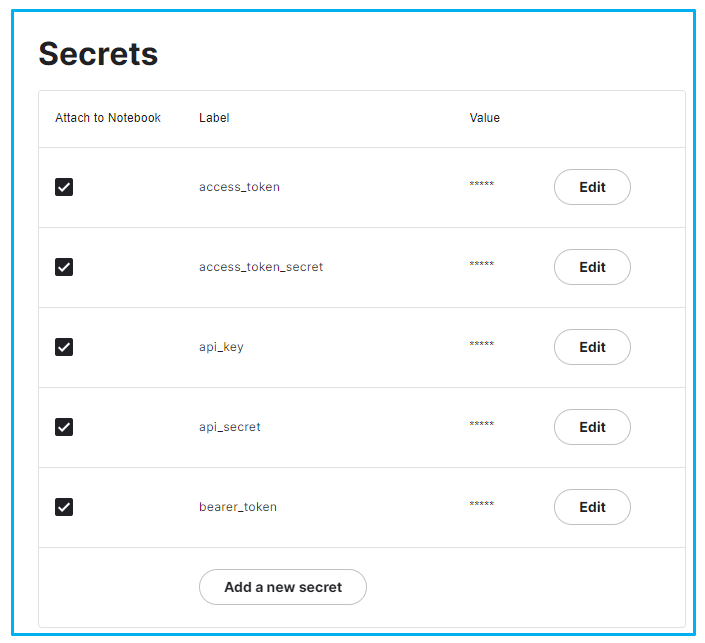

When you use this feature to store and retrieve your secrets we ensure that **only** your Notebook can access the credential. So, if another user forks your public notebook they’ll need to **enter their own** individual secrets to match your implementation.

Once you have added the Keys to your Notebook, you can copy and paste to access your secret with the code below:

In [8]:

# from kaggle_secrets import UserSecretsClient

# user_secrets = UserSecretsClient()
# ACCESS_TOKEN = user_secrets.get_secret("access_token")
# ACCESS_TOKEN_SECRET = user_secrets.get_secret("access_token_secret")
# API_KEY = user_secrets.get_secret("api_key")
# API_SECRET = user_secrets.get_secret("api_secret")
# BEARER_TOKEN = user_secrets.get_secret("bearer_token")


import config_twitter

API_KEY = config_twitter.API_KEY #Your API/Consumer key 
API_SECRET = config_twitter.API_KEY_SECRET #Your API/Consumer Secret Key
BEARER_TOKEN = config_twitter.BEARER_TOKEN # Your API/Bearer Token
ACCESS_TOKEN = config_twitter.ACCESS_TOKEN    #Your Access token key
ACCESS_TOKEN_SECRET = config_twitter.ACCESS_TOKEN_SECRET #Your Access token Secret key


<a id="title-three"></a>
<h1 style='background:#00aaee; border:2; border-radius: 10px; color:white'><center>Connect with Twitter API v2</center></h1>

Let's make a connection with the Twitter API:

In [9]:
client = tweepy.Client(bearer_token = BEARER_TOKEN,
                       consumer_key = API_KEY,
                       consumer_secret = API_SECRET,
                       access_token = ACCESS_TOKEN,
                       access_token_secret = ACCESS_TOKEN_SECRET)

* In order to get Tweets for your purpose using the Twitter API, you need to specify what Tweets you are looking for. To do so, you need to write a **search query**, which gives you the ability to describe the keywords and conditions for which you want Tweets.
* A **search query** or rule can consist of a combination of standalone operators such as keywords and conjunction-required operators such as `is:retweet`. 

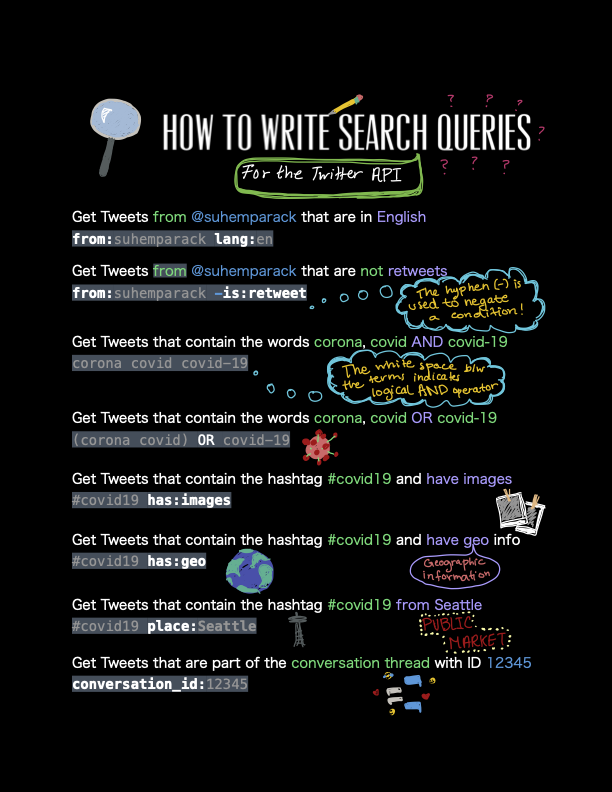

---
* [More about calling API v2 with client](https://docs.tweepy.org/en/stable/client.html#search-tweets)
* Check the following references about building queries:
    * [Getting started with the Twitter API v2 for academic research](https://github.com/twitterdev/getting-started-with-the-twitter-api-v2-for-academic-research/blob/main/modules/5-how-to-write-search-queries.md)
    * [An amazing query builder tool](https://developer.twitter.com/apitools/query?query=)
    * [Build a query with examples](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#examples)

* We pass the search query `search_query` to the `client` object and additionally include more information with `tweet_fields` (author ID and when the Tweet was created).

In [10]:
# define your search query
# get tweets that contain "natural language processing", given they are in English and NOT retweets   
search_query = '"prompt engineering" -is:retweet lang:en'
        
# you should use the author_id expansion if you want the username of the tweet's author.
# Please also note that the username will be in the includes dict (at the root), not in the data one
tweets = client.search_recent_tweets(query=search_query,
                                      tweet_fields=['created_at'],      # include when the Tweet was created
                                      expansions=['author_id'],         # enable you to request additional data objects
                                      max_results=10,                   # maximum number of search results to be returned by a request
                                      user_fields=['username'])

data = tweets.data
users = tweets.includes['users']

In [11]:
# save the output in pandas dataframe
parsed_tweets = []
for user,tweet in zip(users, data):
    parsed_tweets.append([user.id, user.username,user.name, \
                          tweet.created_at,tweet.text])
    
df = pd.DataFrame(parsed_tweets)
df.head()

,0,1,2,3,4
0,1569139058865238016,BirbsonBirb,Justin Birber,2022-10-26 04:37:07+00:00,prompt engineering is a grind.
1,621818469,AR_Kareem_,Abdulrahman Alabdulkareem,2022-10-25 23:07:24+00:00,"@rasbt Also,\n\nPrompt engineering done incorrectly is a form of p-hacking.\n\nSome people don't understand what that means... Those people shouldn't be doing prompt engineering in academia."
2,90073929,adomhartell,ad◎m 🔍⚛️🏗️,2022-10-25 22:56:00+00:00,"&gt;plan to scroll through https://t.co/RfLLMJyerk for hours until I have a good feeling for what makes a good prompt\n&gt;... yeah we're definitely going to automate ""prompt engineering"""
3,1389683959412396032,tautologer,twicetwice,2022-10-25 22:28:59+00:00,"@rebelempiricist I increasingly think that the ""prompt engineering"" era will in fact be quite short, and models will be able to give you what you want no matter how clumsy your prompting is within a generation or two (so, 2-4 years max)"
4,19191383,AndreTI,Andre Infante,2022-10-25 22:00:32+00:00,@Samhanknr @tszzl &gt;an individual human lifetime is more analogous to few shot prompt engineering of the pretrained human foundation than learning language or reasoning from scratch\n\nThis does imply that and is very obviously false.


## Pagination:

Pagination is used basically to limit the number of results in a single response when the result sets are large. However, since the maximum number of search results to be returned by a request is 100, we will use `Paginator` class in the cell below to send multiple requests: 

> **Pagination** is a feature in Twitter API v2 endpoints that return more results than can be returned in a single response. When that happens, the data is returned in a series of 'pages'. Pagination refers to methods for programatically requesting all of the pages, in order to retrieve the entire result data set.

In [12]:
new_tweets_df = pd.DataFrame()

for tweet_batch in tweepy.Paginator(client.search_recent_tweets,
                                    search_query, 
                                    expansions=['author_id'],                   # enable you to request additional data objects
                                    user_fields=['username'],                   # NOTE: use the author_id expansion if you want the username
                                    tweet_fields=["public_metrics,created_at"], # list without space between elements or as before
                                    max_results=100,                            # maximum number of search results to be returned by a request
                                   limit=25):                                    # maximum number of requests
    data = tweet_batch.data
    users = tweet_batch.includes['users']
    users_df = pd.DataFrame(users)
    users_df.columns = ['author_id','author_name','author_username']
    data_df = pd.DataFrame(data)
    tweet_batch_df = users_df.merge(data_df, on="author_id")
    new_tweets_df = new_tweets_df.append(tweet_batch_df,ignore_index=True)

C:\Users\jonch\AppData\Local\Temp\ipykernel_22424\3664891603.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jonch\AppData\Local\Temp\ipykernel_22424\3664891603.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jonch\AppData\Local\Temp\ipykernel_22424\3664891603.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [13]:
new_tweets_df.rename(columns={"id": "tweet_id"}, inplace=True)

<a id="title-four"></a>
<h1 style='background:#00aaee; border:2; border-radius: 10px; color:white'><center>Build the Dataset</center></h1>

Now we can save the dataframe into a `csv` file to build the core dataset: 

> **NOTE**: The cell below must be **activated** in the **first** Save & Run All (Commit) **only**. In addition, the cell in the next section should be **deactivated** in the first run.

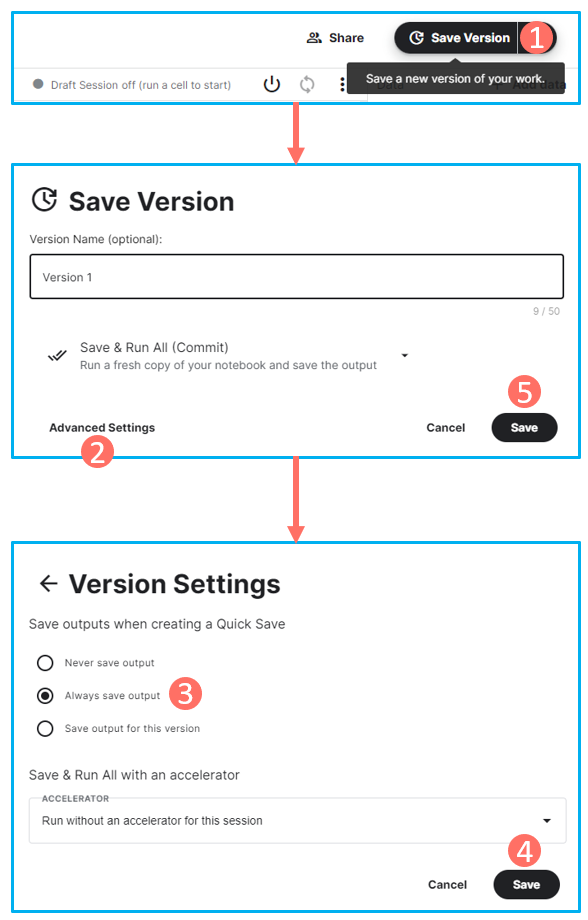

In [15]:
new_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   author_id               259 non-null    int64              
 1   author_name             259 non-null    object             
 2   author_username         259 non-null    object             
 3   created_at              259 non-null    datetime64[ns, UTC]
 4   edit_history_tweet_ids  259 non-null    object             
 5   tweet_id                259 non-null    int64              
 6   public_metrics          259 non-null    object             
 7   text                    259 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 16.3+ KB


In [16]:
# build the dataset
# only for the first run
new_tweets_df.to_csv('twitter_nlp.csv', header=["author_id","author_name","author_username",
                                               "created_at","edit_history_tweet_ids", 
                                               "tweet_id","public_metrics","text"], index=False,)

<a id="title-five"></a>
<h1 style='background:#00aaee; border:2; border-radius: 10px; color:white'><center>Update your Dataset Automatically</center></h1>

Now, we will use an amazing Kaggle feature to update our dataset **automatically** from the notebook’s output (i.e., with every time you run a fresh copy of your notebook and save the output “Save & Run All”). All you need to do is to create a new dataset from the notebook viewer page and synchronize it with the new notebook versions. Check out [this post](https://www.kaggle.com/product-feedback/293761) for more illustration.

> **NOTE**: The cell below must be **deactivated** in the **first run**, You have to **activate** it after scheduling your notebook or when you Save & Run All (Commit) 

To schedule your notebook run, go the settings menu of the notebook editor, schedule the notebook to update either daily, weekly, or monthly:

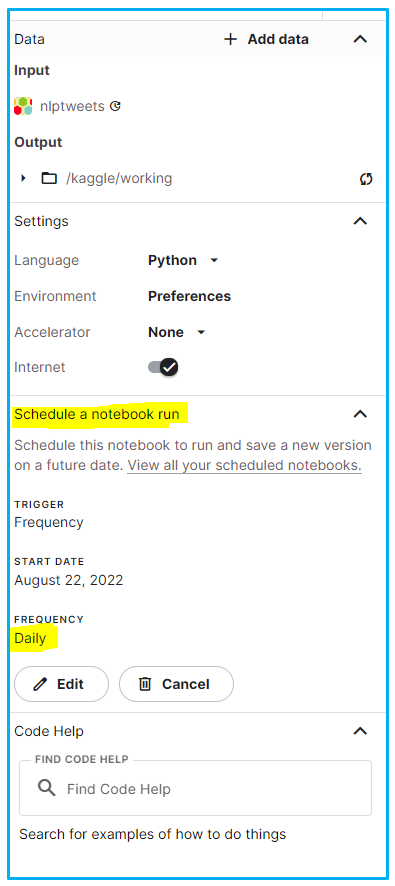

In [18]:
try:
    del new_tweets_df['edit_history_tweet_ids']
except:
    pass 

In [11]:
# get old tweets
old_tweets_df = pd.read_csv("../input/nlptweets/twitter_nlp.csv")

# merge old tweets with new 
updated_tweets = pd.concat([new_tweets_df, old_tweets_df]).drop_duplicates(subset="tweet_id") #subset="text"

# save the merged data into csv file
updated_tweets.to_csv("twitter_nlp.csv", header=["author_id","author_name","author_username",
                                                 "created_at","tweet_id","public_metrics","text"], index=False)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience 🔥. You can share it with your fellow kagglers.
</div>